## London Crime Data Assignment 1

First & foremost, let's import the libraries needed to visualize the London Crime Data

In [37]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins 

The most important part, let's import our csv data, open, read and make a dataframe for it

In [11]:
# open & read data source = csv
open('london_crime_by_lsoa.csv', 'r')

# set data as data frame
df_ori = pd.read_csv('london_crime_by_lsoa.csv')

#duplicate data ori
df = df_ori.copy()
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Data details:  

* lsoa_code: code for Lower Super Output Area in Greater London.
* borough: Common name for London borough.
* major_category: High level categorization of crime
* minor_category: Low level categorization of crime within major category.
* value: monthly reported count of categorical crime in given borough
* year: Year of reported counts, 2008-2016
* month: Month of reported counts, 1-12

In [12]:
# check how many columns & rows in our df
df.shape

(13490604, 7)

In [13]:
# check if there are any missing values
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [14]:
# specify data's columns
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

Let's assume that the value 0 = no crime happening, so we can get rid of the value zero from the entire dataset

In [15]:
# remove the value 0 from the dataset
dff = df[df['value'] != 0]

In [16]:
# check data's statistic summary
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


The amount of data is too much, so we are going to conduct a random sampling for this dataset.

In [17]:
# random sampling
# replace n with the number of rows you want to sample
n = 100  # 100 rows
df2 = dff.sample(n, replace=True)

print(df2.shape)

(100, 7)


In [18]:
# let's check if there are any data duplicates
duplicate_rows = df2[df2.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [lsoa_code, borough, major_category, minor_category, value, year, month]
Index: []


There are no data duplicates found

For plotting purpose, let's sort the data frame

In [19]:
# sort data frame by the year and value
df2_s = df2.sort_values(by=['value', 'year'])

#### Now that we have processed the data, let's start visualizing it!

### 1. Line Chart

How does the overall crime rate in London change throughout the years?

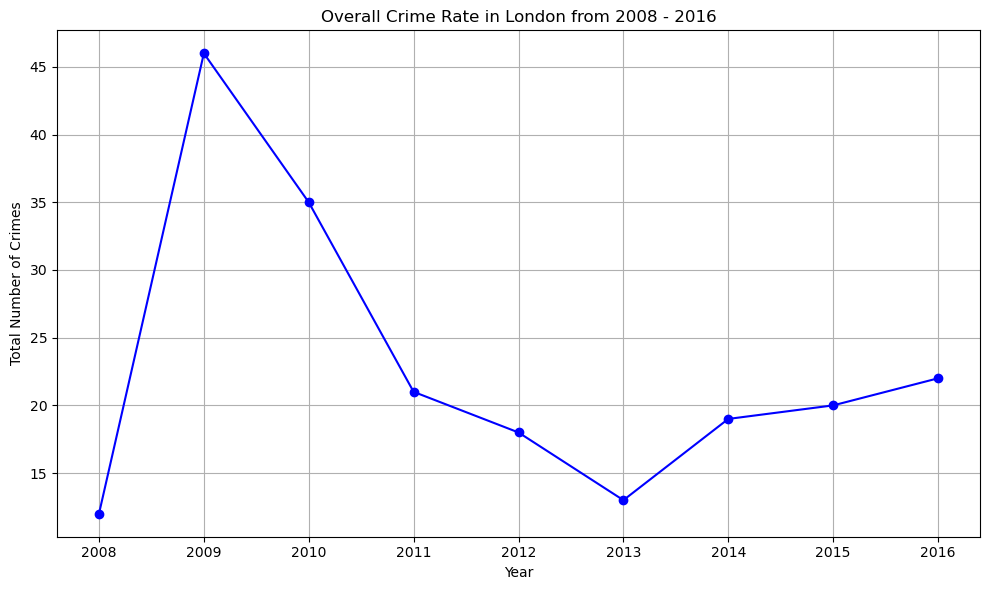

In [20]:
# step 1: group the data by 'year' & calculate the total number of crimes reported in each year
crime_rate_by_year = df2_s.groupby('year')['value'].sum()

# step 2: plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(crime_rate_by_year.index, crime_rate_by_year.values, marker='o', color='b', linestyle='-')
plt.title('Overall Crime Rate in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.xticks(crime_rate_by_year.index)  # to show all years on the x-axis
plt.tight_layout() # to adjust spacing so figure fit better

plt.show()

From the visualization above, it can be seen that the crime rate spikes heavily from the year 2008 - 2009,   
and also dropping significantly the year after: 2010 until 2013

Let's see which borough has the highest crime rate back in the year 2009:

In [60]:
# step 1: filter the df for the year 2009
df_2009= df2_s[df2_s['year'] == 2009]

# step 2: group the filtered df by 'borough' 
crime_by_borough_2009 = df_2009.groupby('borough')['value'].sum()

# step 3: find the borough with the highest total crime value
borough_with_most_crime_2009 = crime_by_borough_2009.idxmax()


print(f"In the year 2009, the borough with the most crime value was {borough_with_most_crime_2009}.")

In the year 2009, the borough with the most crime value was Westminster.


So the highest crime through 2008 - 2016 happened in the borough Westminster in year 2009

### 2. Area Chart

Can we visualize the trend in the number of reported crimes over the years, highlighting different major categories?  

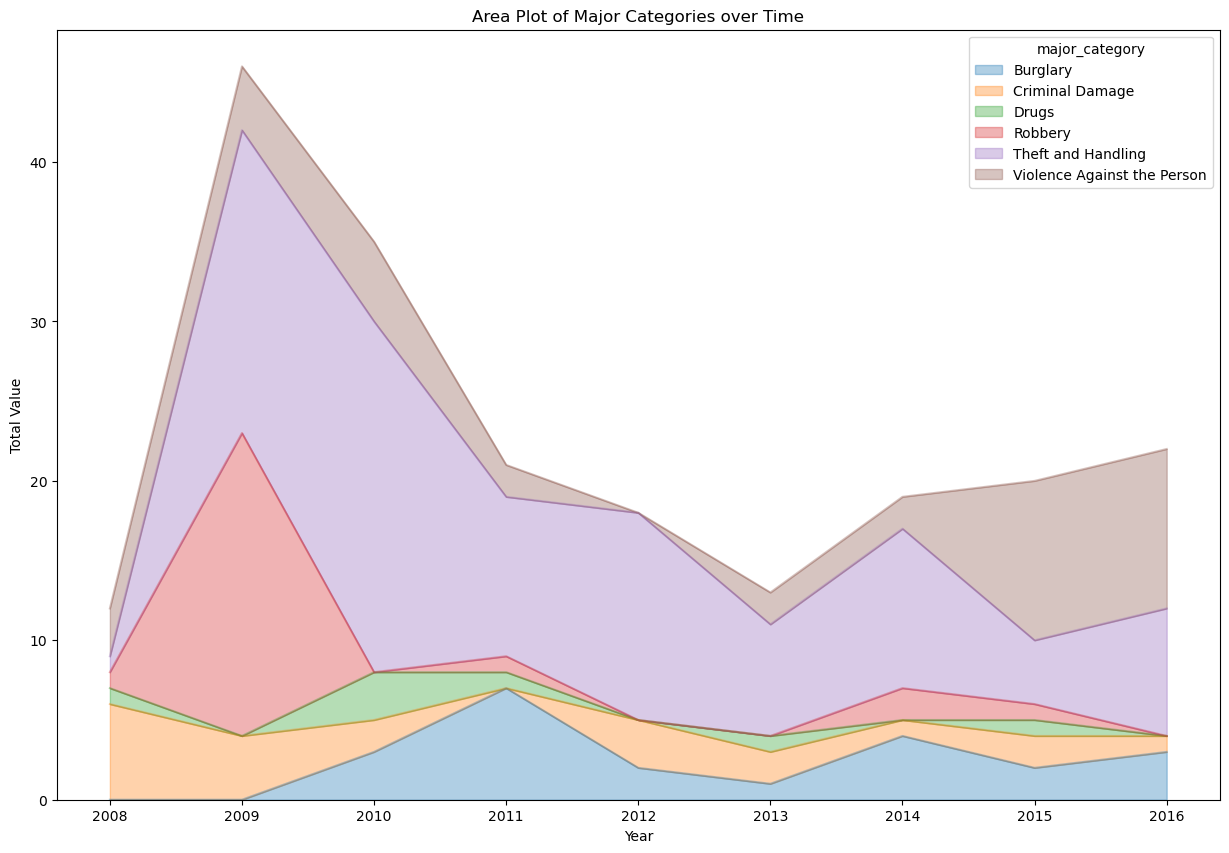

In [22]:
# step 1: pivot the df to create a new df where major categories are columns and the values are aggregated
pivot_df = df2_s.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# step 2: plot the area chart with artist layer
ax = pivot_df.plot(kind='area', stacked=True, alpha=0.35, figsize=(15,10))  # alpha to control transparency

ax.set_xlabel('Year')
ax.set_ylabel('Total Value')
ax.set_title('Area Plot of Major Categories over Time')

plt.show()

The chart showed that violence against the person happened the highest, especially in 2009.

### 3. Bar Chart

What is the distribution of crime values across different boroughs in London? 

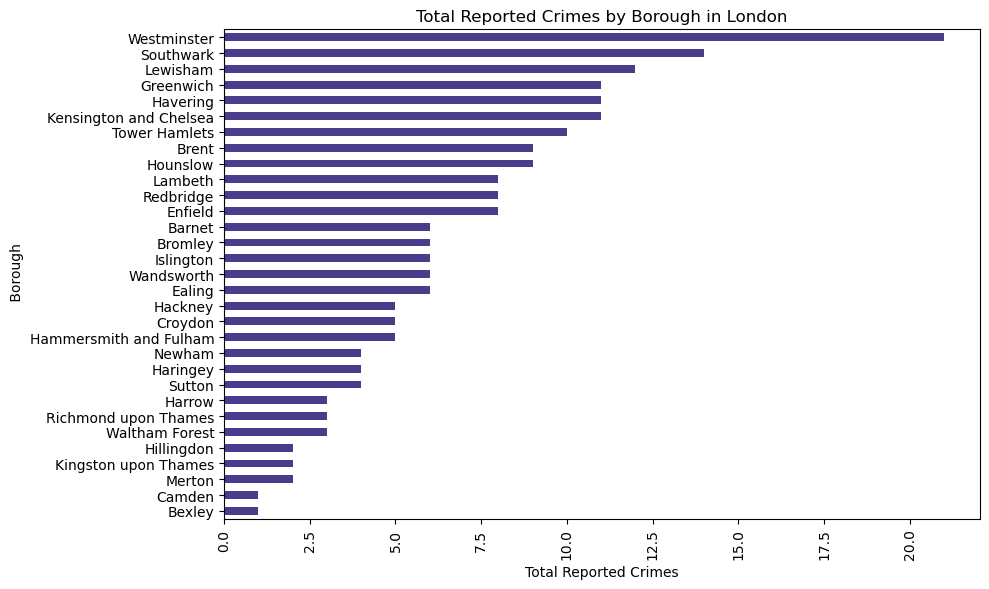

In [23]:
# step 1: group the df by 'borough' 
borough_crime_totals = df2_s.groupby('borough')['value'].sum()

# Sort the boroughs by their total crime values in ascending order
borough_crime_totals_sorted = borough_crime_totals.sort_values()

# Plot the bar plot
plt.figure(figsize=(10, 6))
borough_crime_totals_sorted.plot(kind='barh', color='darkslateblue', figsize=(10,6))
plt.xlabel('Total Reported Crimes')
plt.ylabel(' Borough')
plt.title('Total Reported Crimes by Borough in London')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

From this chart, we can see that Westminster has the highest crime rate, and the lowest crime rates happen equally in Camden and Bexley by 20 times.

### 4. Histogram

How many police areas (LSOAs) are located in each boroughs?

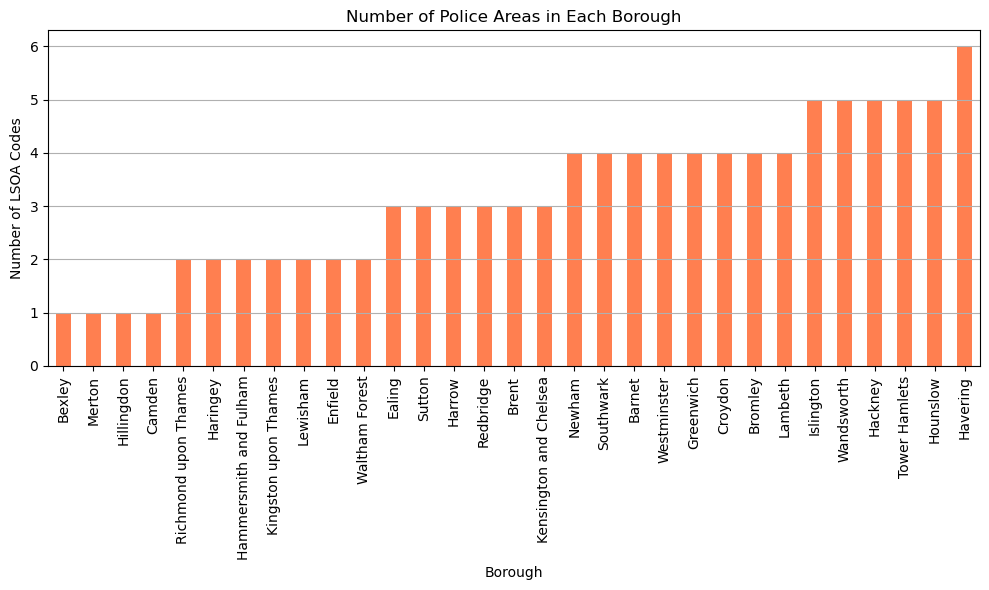

In [24]:
# step 1: group the data by borough and count the number of unique LSOA codes in each group
lsoa_counts = df2.groupby('borough')['lsoa_code'].nunique()

# step 2: sort the data in ascending order by the number of LSOA codes
lsoa_counts_sorted = lsoa_counts.sort_values()

# step 3: plot the bar chart
plt.figure(figsize=(10, 6))
lsoa_counts_sorted.plot(kind='bar', color='coral')
plt.title('Number of Police Areas in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of LSOA Codes')
plt.xticks(rotation=90) 
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()

Even though Westminster has the highest crime rates, it does not have a sufficient police areas to handle such number.  
Instead, Havering has the most police areas, with 6 in number.

### 5. Pie Chart

What are the proportions of the top 10 minor categories of crimes reported in London? 


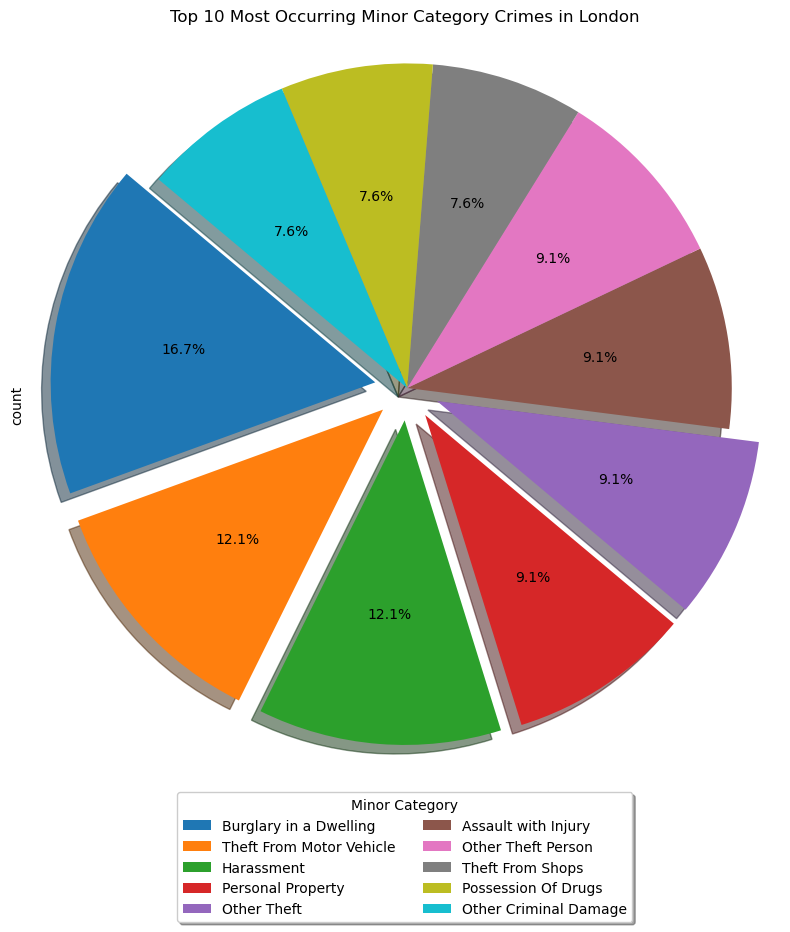

In [25]:
# step 1: count the occurrences of each minor category
minor_category_counts = df2['minor_category'].value_counts()

# step 2: select the top 10 most occurring minor categories
top_10 = minor_category_counts.nlargest(10)

# step 3: create an explode list
explode = [0.1 if category in top_10.index[:5] else 0 for category in top_10.index]

# step 4: plot the pie chart without labels
top_10.plot(kind='pie', figsize=(8, 8), labels=None, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)

plt.title('Top 10 Most Occurring Minor Category Crimes in London')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()


# step 4: add legend below the pie chart
plt.legend(labels=top_10.index, title='Minor Category', loc='lower center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

plt.show()

This pie chart shows that Burglary in a Dwelling has the highest share of minor crimes among the rest of the data.

Then followed equally by Theft from Motor Vehicle and Harrassment with 12.1% out of the total proportion.

### 6. Box Plot

How does the distribution of crime values vary across different months in a year?  


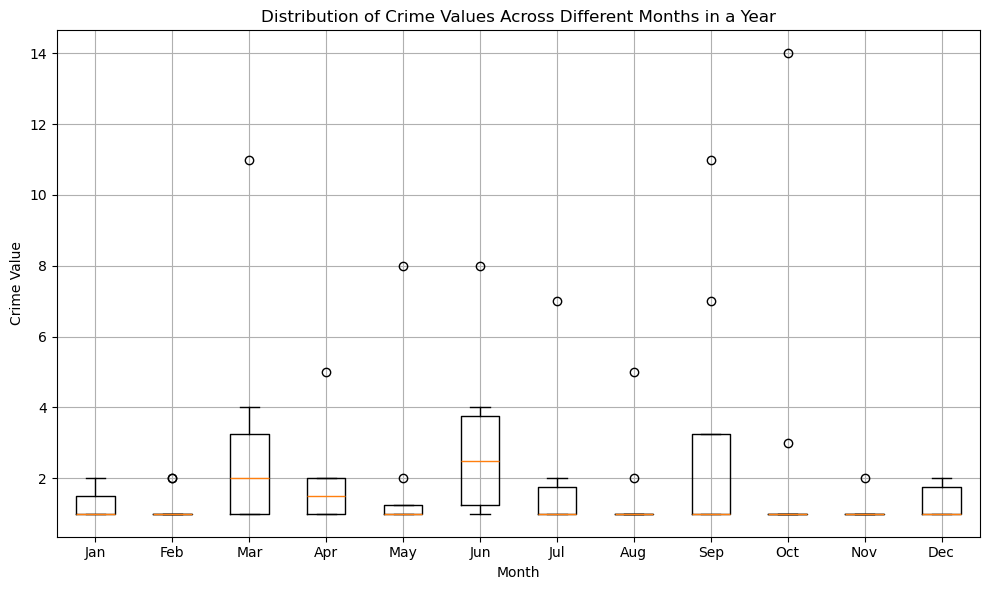

In [26]:
# create a box plot
plt.figure(figsize=(10, 6))

plt.boxplot([df2[df2['month'] == month]['value'] for month in range(1, 13)], labels=[str(month) for month in range(1, 13)])
plt.title('Distribution of Crime Values Across Different Months in a Year')
plt.xlabel('Month')
plt.ylabel('Crime Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # to translate the numbers into months
plt.grid(True)
plt.tight_layout()

plt.show()

The boxplot of each months vary differently, with the furthest outlier occurring in October.  
This should be noted so a more thorough analysis could be conducted to find out the cause of such abnormality.

### 7. Scatter Plot

Is there any relationship between the number of reported crimes and the boroughs in London? 

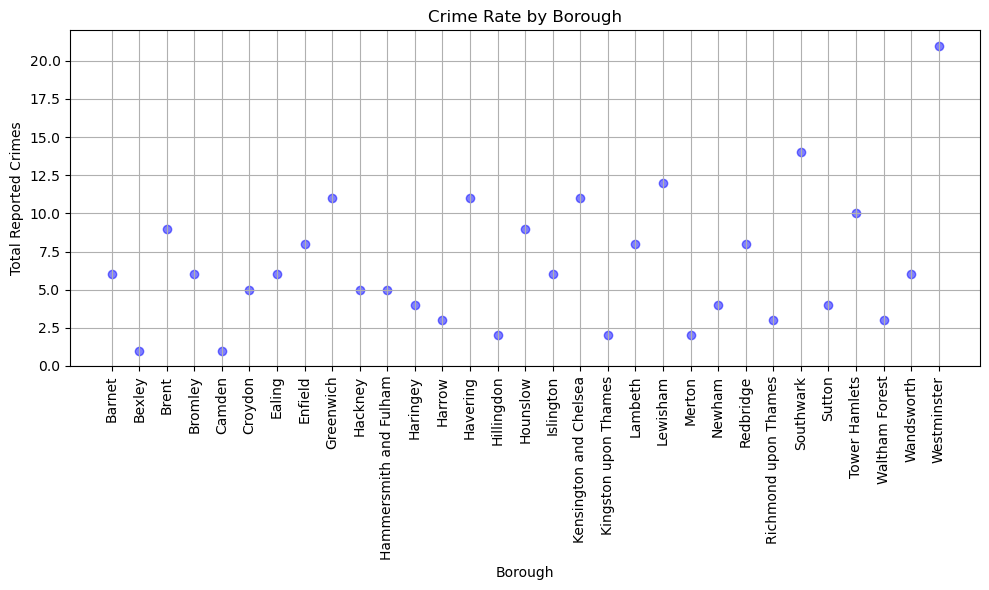

In [27]:
# step 1: group the data by borough and count the total number of reported crimes for each borough
crime_by_borough = df2.groupby('borough')['value'].sum().reset_index() # so the groupby index becomes a column again

# step 2: plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_by_borough['borough'], crime_by_borough['value'], color='blue', alpha=0.5)
plt.title('Crime Rate by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Reported Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot looks very scattered, showing no consistent pattern.  
This denotes that the relationship between crime rates and borough is weak, meaning that there is no apparent relationship betweeen two variables.

### 8. Word Clouds

What are the most common types of crimes reported in London? 

For creating a wordcloud, more words in a data would look better than lesser words.  
Therefore, we are using the df data that hasn't been randomly sampled, to include more words.

In [28]:
# step 1: convert text data in 'major_category' column to lowercase
df['major_category'] = df['major_category'].str.lower()

# do the same to 'minor_category' column to lowercase
df['minor_category'] = df['minor_category'].str.lower()

# also do the same to 'borough' column to lowercase
df['borough'] = df['borough'].str.lower()

In [29]:
# step 2: combine text data from multiple columns into one string
text = ' '.join(df['major_category']) + ' ' + ' '.join(df['minor_category']) + ' ' + ' '.join(df['borough'])

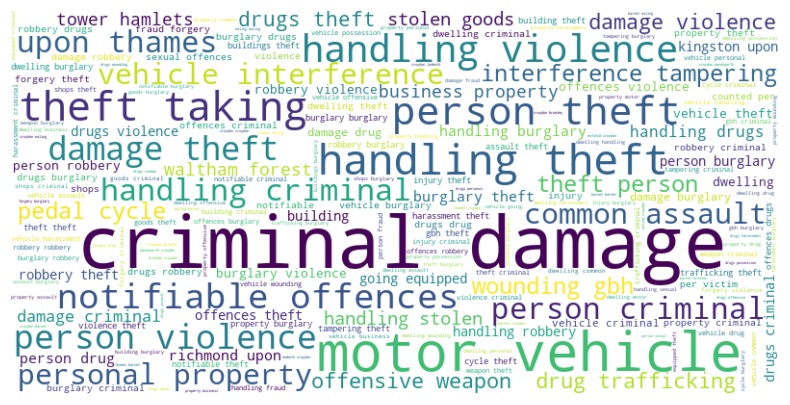

In [31]:
# step 3: generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# step 4: display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

person is not a useful information in this context, so we need to remove it from the cloud with STOPWORDS

In [32]:
stopwords=set(STOPWORDS)

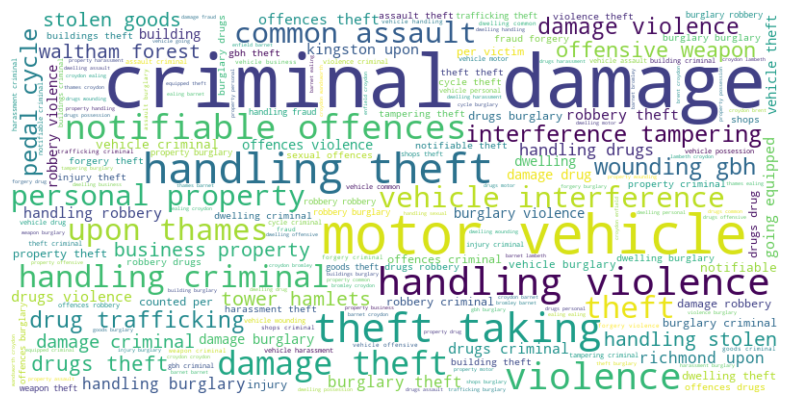

In [33]:
# step 1: add the words person to stopwords
stopwords.add('person') 

# step 2: re-generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# step 3: display the cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word damage, criminal, and motor vehicle appears the most in the cloud, indicating the most crimes happening with those keywords.

### 9. Map


Create a map for the top 3 boroughs with the most crime rates!

In [35]:
# London latitude and longitude values
latitude = 51.51
longitude = -0.13

In [36]:
# create map and display
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
london_map

Before we start, let's combine the major_category and minor_category into one column:

In [38]:
# combine the major_category and minor_category
df2['combined_category'] = df2['major_category'] + ' - ' + df2['minor_category']

In [40]:
# check to see new column addition
df2.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month', 'combined_category'],
      dtype='object')

Now, find out the top 3 boroughs with the most crime values in London

In [59]:
# step 1: group the DataFrame by the 'borough' column and calculate the sum of crime values
borough_totals = df2.groupby('borough')['value'].sum()

# step 2: sort the resulting Series in descending order
sorted_borough_totals = borough_totals.sort_values(ascending=False)

# step 3: select the top 3 boroughs
top_3_boroughs = sorted_borough_totals.head(3)

print(top_3_boroughs)

borough
Westminster    21
Southwark      14
Lewisham       12
Name: value, dtype: int64


Now, create a new dataframe with the new top 3 boroughs data, the top 3 borough's coordinates, and the combined crime categories.

In [54]:
# step 1: define the top 3 boroughs
top_3_bors = ['Westminster', 'Southwark', 'Lewisham']

# step 2: filter the original df to include only data for the top 3 boroughs
filt_df = df2[df2['borough'].isin(top_3_bors)]

# step 3: create a df containing the coordinates for each borough
borough_coordinates_df = pd.DataFrame({
    'borough': ['Westminster', 'Southwark', 'Lewisham'],
    'latitude': [51.4975, 51.5035, 51.4415],
    'longitude': [-0.1357, -0.0804, -0.0117]
})

# step 4: merge the filtered data with the coordinates df
merged_df = pd.merge(filt_df, borough_coordinates_df, on='borough')

# step 5: calculate the combined category from minor_category + major_category
merged_df['combined_category'] = merged_df['major_category'] + ' - ' + merged_df['minor_category']

# step 6: create a new df with the above columns
new_df = merged_df[['borough', 'latitude', 'longitude', 'combined_category']]

# step 7: display the new df
print(new_df)

       borough  latitude  longitude  \
0  Westminster   51.4975    -0.1357   
1  Westminster   51.4975    -0.1357   
2  Westminster   51.4975    -0.1357   
3  Westminster   51.4975    -0.1357   
4    Southwark   51.5035    -0.0804   
5    Southwark   51.5035    -0.0804   
6    Southwark   51.5035    -0.0804   
7    Southwark   51.5035    -0.0804   
8     Lewisham   51.4415    -0.0117   
9     Lewisham   51.4415    -0.0117   

                                   combined_category  
0                        Robbery - Personal Property  
1      Theft and Handling - Theft From Motor Vehicle  
2       Violence Against the Person - Common Assault  
3              Theft and Handling - Theft From Shops  
4                  Burglary - Burglary in a Dwelling  
5            Theft and Handling - Other Theft Person  
6         Violence Against the Person - Wounding/GBH  
7            Criminal Damage - Other Criminal Damage  
8      Theft and Handling - Theft From Motor Vehicle  
9  Criminal Damage -

In [56]:
# just in case, remove duplicate rows
new_df = merged_df.drop_duplicates()

print(new_df)

   lsoa_code      borough               major_category  \
0  E01004734  Westminster                      Robbery   
1  E01033600  Westminster           Theft and Handling   
2  E01004656  Westminster  Violence Against the Person   
3  E01004724  Westminster           Theft and Handling   
4  E01004074    Southwark                     Burglary   
5  E01032720    Southwark           Theft and Handling   
6  E01004004    Southwark  Violence Against the Person   
7  E01004047    Southwark              Criminal Damage   
8  E01003283     Lewisham           Theft and Handling   
9  E01003203     Lewisham              Criminal Damage   

                      minor_category  value  year  month  \
0                  Personal Property     14  2009     10   
1           Theft From Motor Vehicle      1  2012      1   
2                     Common Assault      1  2016      1   
3                   Theft From Shops      5  2011      4   
4             Burglary in a Dwelling      1  2014      3   
5

#### All set!   
Now let's create a folium map with markers clustered for the incidents in the new_df, using the latitude, longitude, and combined category columns. 

In [58]:
# step 1: define the center coordinates for the map
latitude = 51.509865
longitude = -0.118092

# step 2: create a folium map object
london_map_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# step 3: instantiate a mark cluster object for the incidents in the new_df
incidents = plugins.MarkerCluster().add_to(london_map)

# step 4: loop through the new_df and add each data point to the mark cluster
for lat, lng, label in zip(new_df['latitude'], new_df['longitude'], new_df['combined_category']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incidents)

# step 4: display the map
london_map

---
$Thank you$  
---